This assignment uses data from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/), a popular repository for machine learning datasets. In particular, we will be using the “Individual household electric power consumption Data Set” which I have made available on the course web site:
* **Dataset**: [Electric power consumption](https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip) [20Mb]
* **Description**: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

The following descriptions of the 9 variables in the dataset are taken from the [UCI web site](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption):

1. **Date**: Date in format dd/mm/yyyy
2. **Time**: time in format hh:mm:ss
3. **Global_active_power**: household global minute-averaged active power (in kilowatt)
4. **Global_reactive_power**: household global minute-averaged reactive power (in kilowatt)
5. **Voltage**: minute-averaged voltage (in volt)
6. **Global_intensity**: household global minute-averaged current intensity (in ampere)
7. **Sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. **Sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. **Sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Loading the data**

When loading the dataset into R, please consider the following:

* The dataset has 2,075,259 rows and 9 columns. First calculate a rough estimate of how much memory the dataset will require in memory before reading into R. Make sure your computer has enough memory (most modern computers should be fine).
* We will only be using data from the dates 2007-02-01 and 2007-02-02. One alternative is to read the data from just those dates rather than reading in the entire dataset and subsetting to those dates.
* You may find it useful to convert the Date and Time variables to Date/Time classes in R using the `strptime()` and `as.Date()` functions.
* Note that in this dataset missing values are coded as `?`.

**Making Plots**

Our overall goal here is simply to examine how household energy usage varies over a 2-day period in February, 2007. Your task is to reconstruct the following plots below, all of which were constructed using the base plotting system.

![](https://d396qusza40orc.cloudfront.net/exdata/CP1/ExDataCP1Plot1.png)
![](https://d396qusza40orc.cloudfront.net/exdata/CP1/ExDataCP1Plot2.png)
![](https://d396qusza40orc.cloudfront.net/exdata/CP1/ExDataCP1Plot3.png)
![](https://d396qusza40orc.cloudfront.net/exdata/CP1/ExDataCP1Plot4.png)

In [2]:
if(!file.exists('./data')){dir.create('./data')}
# download the dataset
url <- 'https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip'

download.file(url = url, destfile = './data/power.zip', method = 'curl')

# unzip it
unzip(zipfile = './data/power.zip', exdir = './data')
list.files('./data')

[1] "household_power_consumption.txt" "power.zip"

In [23]:
power <- read.table(file = './data/household_power_consumption.txt', sep = ';', header = TRUE, na.strings = '?', )
head(power)

Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17
16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16
16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17
16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17
16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17
16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0,2,17


In [7]:
summary(power)

        Date               Time         Global_active_power
 1/1/2007 :   1440   17:24:00:   1442   Min.   : 0.076     
 1/1/2008 :   1440   17:25:00:   1442   1st Qu.: 0.308     
 1/1/2009 :   1440   17:26:00:   1442   Median : 0.602     
 1/1/2010 :   1440   17:27:00:   1442   Mean   : 1.092     
 1/10/2007:   1440   17:28:00:   1442   3rd Qu.: 1.528     
 1/10/2008:   1440   17:29:00:   1442   Max.   :11.122     
 (Other)  :2066619   (Other) :2066607   NA's   :25979      
 Global_reactive_power    Voltage      Global_intensity Sub_metering_1  
 Min.   :0.000         Min.   :223.2   Min.   : 0.200   Min.   : 0.000  
 1st Qu.:0.048         1st Qu.:239.0   1st Qu.: 1.400   1st Qu.: 0.000  
 Median :0.100         Median :241.0   Median : 2.600   Median : 0.000  
 Mean   :0.124         Mean   :240.8   Mean   : 4.628   Mean   : 1.122  
 3rd Qu.:0.194         3rd Qu.:242.9   3rd Qu.: 6.400   3rd Qu.: 0.000  
 Max.   :1.390         Max.   :254.2   Max.   :48.400   Max.   :88.000  
 NA's   :

In [27]:
power1 <- power[power$Date %in% c('1/2/2007', '2/2/2007'),]
summary(power1)

       Date            Time      Global_active_power Global_reactive_power
 1/2/2007:1440   00:00:00:   2   Min.   :0.220       Min.   :0.0000       
 2/2/2007:1440   00:01:00:   2   1st Qu.:0.320       1st Qu.:0.0000       
 1/1/2007:   0   00:02:00:   2   Median :1.060       Median :0.1040       
 1/1/2008:   0   00:03:00:   2   Mean   :1.213       Mean   :0.1006       
 1/1/2009:   0   00:04:00:   2   3rd Qu.:1.688       3rd Qu.:0.1440       
 1/1/2010:   0   00:05:00:   2   Max.   :7.482       Max.   :0.5000       
 (Other) :   0   (Other) :2868                                            
    Voltage      Global_intensity Sub_metering_1    Sub_metering_2  
 Min.   :233.1   Min.   : 1.000   Min.   : 0.0000   Min.   :0.0000  
 1st Qu.:238.4   1st Qu.: 1.400   1st Qu.: 0.0000   1st Qu.:0.0000  
 Median :240.6   Median : 4.600   Median : 0.0000   Median :0.0000  
 Mean   :240.4   Mean   : 5.102   Mean   : 0.4062   Mean   :0.2576  
 3rd Qu.:242.4   3rd Qu.: 7.000   3rd Qu.: 0.0000   3rd

In [28]:
head(power1)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
66637,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0,0,0
66638,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0,0,0
66639,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0,0,0
66640,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0,0,0
66641,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0,0,0
66642,1/2/2007,00:05:00,0.320,0.126,242.29,1.4,0,0,0


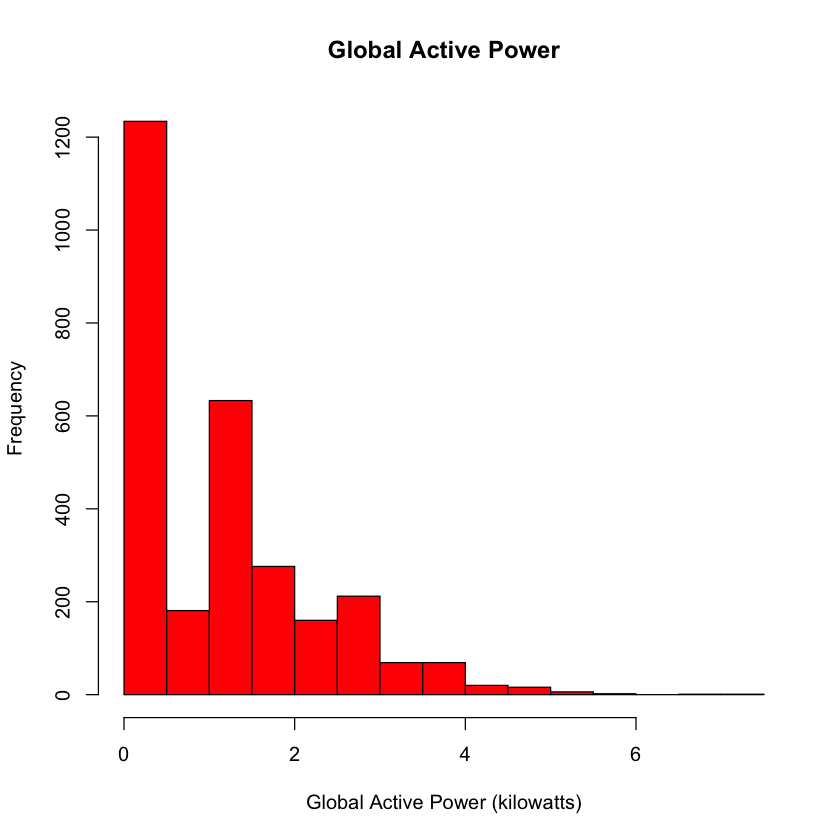

In [33]:
# plot #1
hist(power1$Global_active_power, col = 'red', xlab = 'Global Active Power (kilowatts)', main = 'Global Active Power')

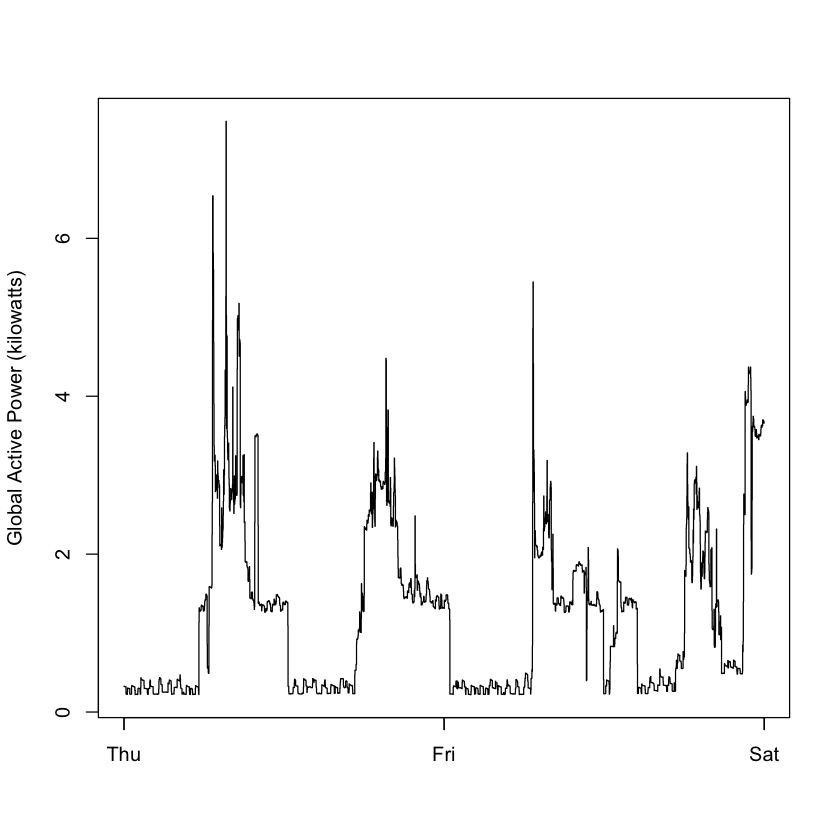

In [38]:
# plot 2
library(lubridate)

power1$date_time <- with(power1, dmy(Date) + hms(Time))

plot(power1$date_time, power1$Global_active_power, type="n", ylab = 'Global Active Power (kilowatts)', xlab = '', )
lines(power1$date_time, power1$Global_active_power, type = 's')

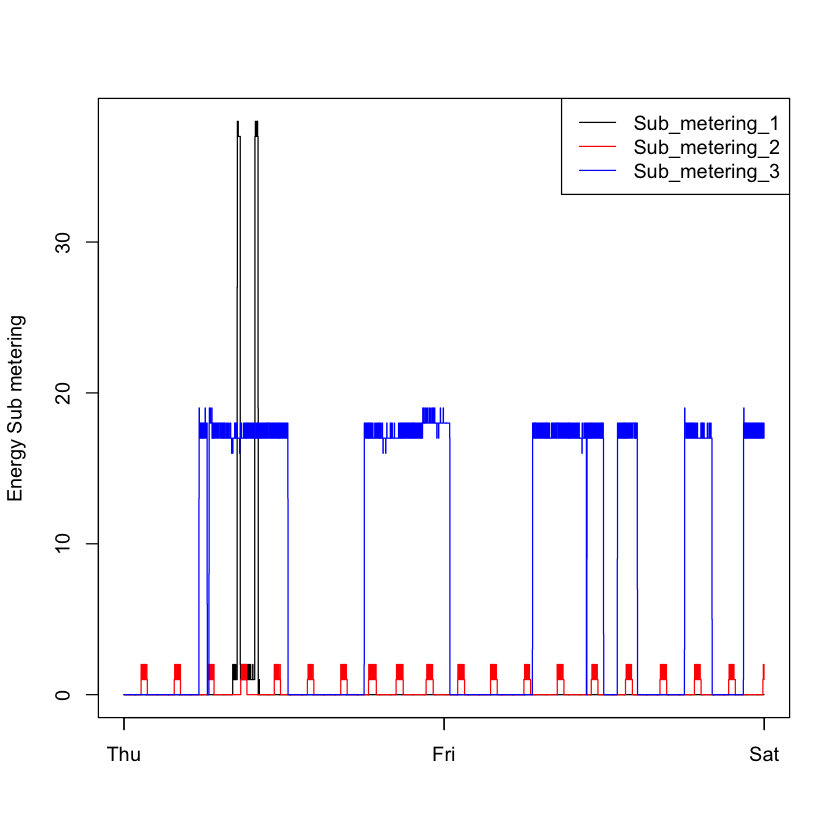

In [43]:
# plot #3
plot(power1$date_time, power1$Sub_metering_1, type="n", ylab = 'Energy Sub metering', xlab = '')
lines(power1$date_time, power1$Sub_metering_1, type = 's')
lines(power1$date_time, power1$Sub_metering_2, col = 'red', type = 's')
lines(power1$date_time, power1$Sub_metering_3, col = 'blue', type = 's')
legend('topright', col = c('black', 'red', 'blue'), legend = c('Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'), lty = 1)

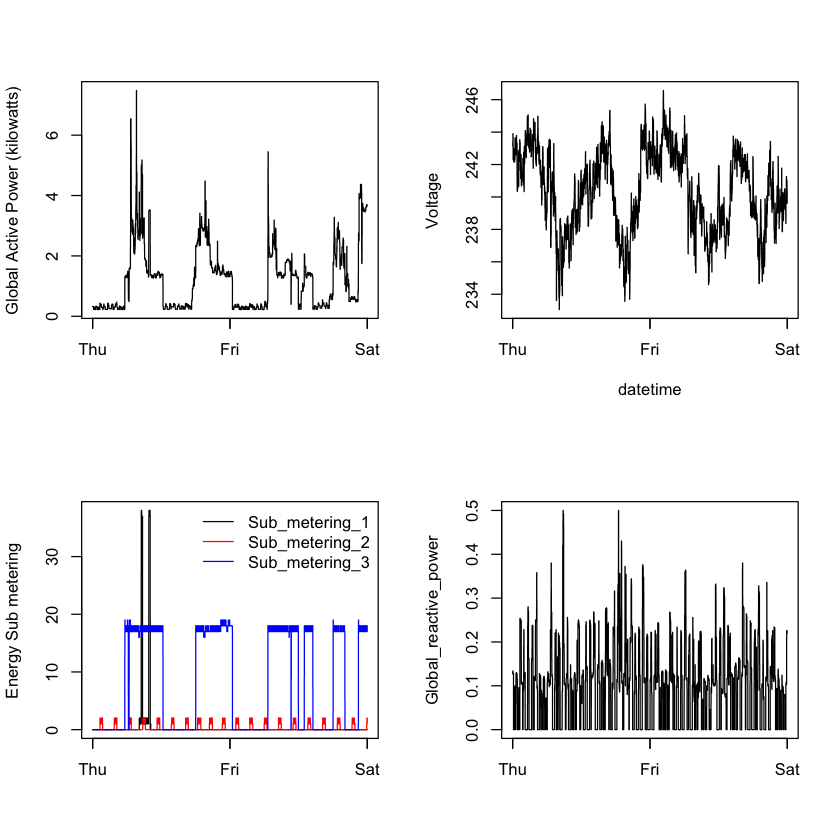

In [46]:
# plot 4
par(mfrow = c(2, 2))

plot(power1$date_time, power1$Global_active_power, type="n", ylab = 'Global Active Power (kilowatts)', xlab = '', )
lines(power1$date_time, power1$Global_active_power, type = 's')

plot(power1$date_time, power1$Voltage, type="n", ylab = 'Voltage', xlab = 'datetime', )
lines(power1$date_time, power1$Voltage, type = 's')

plot(power1$date_time, power1$Sub_metering_1, type="n", ylab = 'Energy Sub metering', xlab = '')
lines(power1$date_time, power1$Sub_metering_1, type = 's')
lines(power1$date_time, power1$Sub_metering_2, col = 'red', type = 's')
lines(power1$date_time, power1$Sub_metering_3, col = 'blue', type = 's')
legend('topright', col = c('black', 'red', 'blue'), legend = c('Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'), lty = 1, bty = "n")

plot(power1$date_time, power1$Global_reactive_power, type="n", ylab = 'Global_reactive_power', xlab = '', )
lines(power1$date_time, power1$Global_reactive_power, type = 's')